<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ala5-BioEn-optimize-API-example" data-toc-modified-id="Ala5-BioEn-optimize-API-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ala5 BioEn-optimize API example</a></span></li><li><span><a href="#Read-$\phi$-and-$\psi$-dihedral-angles" data-toc-modified-id="Read-$\phi$-and-$\psi$-dihedral-angles-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read $\phi$ and $\psi$ dihedral angles</a></span></li><li><span><a href="#example-calculation-for-J-couplings" data-toc-modified-id="example-calculation-for-J-couplings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>example calculation for J-couplings</a></span></li><li><span><a href="#Read-J-couplings" data-toc-modified-id="Read-J-couplings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Read J-couplings</a></span></li><li><span><a href="#Prepare-BioEn-optimization" data-toc-modified-id="Prepare-BioEn-optimization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prepare BioEn optimization</a></span><ul class="toc-item"><li><span><a href="#Function-to-run-series-of-BioEn-optimizations" data-toc-modified-id="Function-to-run-series-of-BioEn-optimizations-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Function to run series of BioEn optimizations</a></span></li><li><span><a href="#Handling-output" data-toc-modified-id="Handling-output-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Handling output</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Elbow-plots" data-toc-modified-id="Elbow-plots-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Elbow plots</a></span></li><li><span><a href="#Ramachandran-plots" data-toc-modified-id="Ramachandran-plots-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Ramachandran plots</a></span><ul class="toc-item"><li><span><a href="#MD-results" data-toc-modified-id="MD-results-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>MD results</a></span></li><li><span><a href="#Optimal-BioEn-ensemble" data-toc-modified-id="Optimal-BioEn-ensemble-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Optimal BioEn ensemble</a></span></li></ul></li><li><span><a href="#PDB-statistics" data-toc-modified-id="PDB-statistics-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>PDB statistics</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Plot</a></span></li></ul></li></ul></div>

### Ala5 BioEn-optimize API example

Some code to generate the BioEn inputs to use BioEn optimize via its Python API.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def loop_data_files_ala5(jkeys, sim_fn, r_tup=(2,6)):
    sim_fn_l = []
    c = 0
    for i, k in enumerate(jkeys):
        for r in range(r_tup[0], r_tup[1]):  
            fn = sim_fn.format(r,k)
            if os.path.exists(fn):
                c += 1
                sim_fn_l.append(fn)
    return c, sim_fn_l


def ala5_jcouplings_bioen_input(jkeys, J,
    sim_fn="../../jcoupling_sk10/dft2/r{}_J{}_dft2_deg_err_bl5", skip=1,
    return_exp_details=False, err_column_name="sigma"):
    
    # definition of the output arrays
    n_exp, sim_fn_l = loop_data_files_ala5(jkeys, sim_fn)
    n_stru = len(np.genfromtxt(sim_fn_l[0])[::skip])
    
    y_tilde = np.zeros((n_exp, n_stru))
    yTilde = np.zeros((n_exp, n_stru))
    Y_Tilde = np.zeros(n_exp)
    
    # experiment unscale and experimental error
    exp_unscaled = np.zeros(n_exp)
    exp_sigma = np.zeros(n_exp)
    
    res_jcp_l = []
    c = 0
    for i, k in enumerate(jkeys):
        for r in range(2,6):  
        #fn = "../../orig/r{}_J{}_orig_deg_err_bl10".format(r,k)
            fn = sim_fn.format(r,k)
            if os.path.exists(fn):
                sim_ar = np.genfromtxt(fn)[::skip]
                y_tilde[c,:] = sim_ar
                print c, r, k
                exp = J[(J['Jtype']==k) & (J['res']==r)]
                
                # error 
                obsv_err = exp[err_column_name].values
                yTilde[c,:] = np.copy(sim_ar) / obsv_err [:,None]
                Y_Tilde[c] =  exp.Jexpt.values /  obsv_err 
                
                exp_unscaled[c] = exp.Jexpt.values
                exp_sigma[c] = obsv_err 
                
                res_jcp_l.append("r{} {}".format(r,k))            
                c +=1
            else:
                print "missing"
    
    if return_exp_details:
        return res_jcp_l, y_tilde, yTilde, Y_Tilde.T, np.column_stack((exp_unscaled, 
                                                                exp_sigma))
    else:
        return res_jcp_l, y_tilde, yTilde, Y_Tilde.T

### Read $\phi$ and $\psi$ dihedral angles

In [2]:
! tar xfv ala5-release-1.tar.gz

dft2.tar.bz2
phi_psi_deg.tar.gz
ala_phi_psi.txt


In [3]:
! tar xfv phi_psi_deg.tar.gz

c_phi_psi_deg_4
c_phi_psi_deg_3
c_phi_psi_deg_2
c_phi_psi_deg_6
c_phi_psi_deg_5


### example calculation for J-couplings

c.f., calculation as in Best and co-workers 2008.

In [4]:
def karplus_eq(theta, A, B, C, delta):
    return A*np.cos(theta+delta)**2 + B*np.cos(theta+delta) + C

def calc_j3_hn_ha(phi, A=9.14, B=-2.28, C=-0.29, delta=np.deg2rad(-64.51)):
    return karplus_eq(phi, A, B, C, delta)

In [5]:
deg_l = []
for i in range(2,7):
    deg_l.append(np.loadtxt("./c_phi_psi_deg_{}".format(i)))

In [6]:
j3_hnha = calc_j3_hn_ha(np.deg2rad(deg_l[1])[:,0], delta=np.deg2rad(-64.51))

In [7]:
j3_hnha.shape

(100001,)

In [8]:
! tar xfv dft2.tar.bz2

dft2/
dft2/r4_J3JHNC_dft2_deg_err_bl5
dft2/r5_J1JNCA_dft2_deg_err_bl5
dft2/r3_J3JHAC_dft2_deg_err_bl5
dft2/r2_J3JHNCA_dft2_deg_err_bl5
dft2/r4_J1JNCA_dft2_deg_err_bl5
dft2/r5_J2JNCA_dft2_deg_err_bl5
dft2/r4_J3JHNCB_dft2_deg_err_bl5
dft2/r5_J3JHNHA_dft2_deg_err_bl5
dft2/r2_J3JHNC_dft2_deg_err_bl5
dft2/r2_J3JHAC_dft2_deg_err_bl5
dft2/r3_J3JHNCB_dft2_deg_err_bl5
dft2/r4_J2JNCA_dft2_deg_err_bl5
dft2/r5_J3JHNCA_dft2_deg_err_bl5
dft2/r2_J3JHNHA_dft2_deg_err_bl5
dft2/r2_J1JNCA_dft2_deg_err_bl5
dft2/r5_J3JHNCB_dft2_deg_err_bl5
dft2/r3_J1JNCA_dft2_deg_err_bl5
dft2/r3_J3JHNCA_dft2_deg_err_bl5
dft2/r4_J3JHAC_dft2_deg_err_bl5
dft2/r2_J3JCC_dft2_deg_err_bl5
dft2/r5_J3JHAC_dft2_deg_err_bl5
dft2/r3_J3JHNHA_dft2_deg_err_bl5
dft2/r4_J3JHNHA_dft2_deg_err_bl5
dft2/r2_J3JHNCB_dft2_deg_err_bl5
dft2/r4_J3JHNCA_dft2_deg_err_bl5
dft2/r5_J3JHNC_dft2_deg_err_bl5
dft2/r3_J2JNCA_dft2_deg_err_bl5
dft2/dft2_deg_err_bl5_j.dat
dft2/r2_J2JNCA_dft2_deg_err_bl5


In [9]:
ref_j3_hnha = np.genfromtxt("dft2/r2_J3JHNHA_dft2_deg_err_bl5")

Zoom in onto initial part of trajectory.

Text(0.5,0,'Time [ps]')

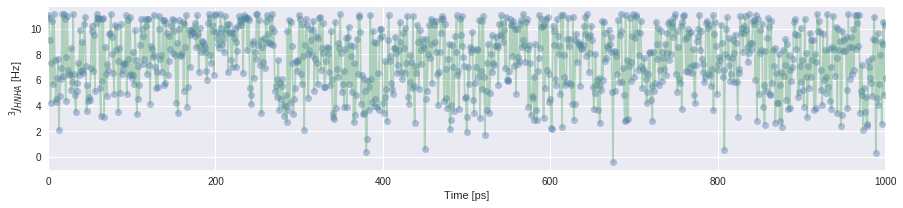

In [10]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(ref_j3_hnha, "o", alpha=0.4)
plt.plot(j3_hnha, "-", alpha=0.4)
plt.xlim(0,1000)
plt.ylabel("$^3J_{HNHA}$ [Hz]")
plt.xlabel("Time [ps]")

Note that diverse J-couplings are calculated for the trajectory.

### Read J-couplings

In [11]:
jkeys = ["3JHNHA","3JHNC","3JHAC","3JCC","3JHNCB","1JNCA","2JNCA","3JHNCA"]

In [12]:
skip = 20 # 20-> 50k
j_ar = np.zeros((28,  1000001))[:,::skip]
j_ar.shape

(28, 50001)

In [13]:
! ls dft2

dft2_deg_err_bl5_j.dat	     r4_J1JNCA_dft2_deg_err_bl5
r2_J1JNCA_dft2_deg_err_bl5   r4_J2JNCA_dft2_deg_err_bl5
r2_J2JNCA_dft2_deg_err_bl5   r4_J3JHAC_dft2_deg_err_bl5
r2_J3JCC_dft2_deg_err_bl5    r4_J3JHNCA_dft2_deg_err_bl5
r2_J3JHAC_dft2_deg_err_bl5   r4_J3JHNCB_dft2_deg_err_bl5
r2_J3JHNCA_dft2_deg_err_bl5  r4_J3JHNC_dft2_deg_err_bl5
r2_J3JHNCB_dft2_deg_err_bl5  r4_J3JHNHA_dft2_deg_err_bl5
r2_J3JHNC_dft2_deg_err_bl5   r5_J1JNCA_dft2_deg_err_bl5
r2_J3JHNHA_dft2_deg_err_bl5  r5_J2JNCA_dft2_deg_err_bl5
r3_J1JNCA_dft2_deg_err_bl5   r5_J3JHAC_dft2_deg_err_bl5
r3_J2JNCA_dft2_deg_err_bl5   r5_J3JHNCA_dft2_deg_err_bl5
r3_J3JHAC_dft2_deg_err_bl5   r5_J3JHNCB_dft2_deg_err_bl5
r3_J3JHNCA_dft2_deg_err_bl5  r5_J3JHNC_dft2_deg_err_bl5
r3_J3JHNCB_dft2_deg_err_bl5  r5_J3JHNHA_dft2_deg_err_bl5
r3_J3JHNHA_dft2_deg_err_bl5


In [14]:
J_dft2 = pd.read_table("dft2/dft2_deg_err_bl5_j.dat", 
                  delim_whitespace=True, skipfooter=1, engine='python')

In [15]:
#tabel_l = [J_dft1, J_dft2, J_orig]
#set_names_l = ["dft1", "dft2", "orig"]

tabel_l = [ J_dft2]
set_names_l = [ "dft2"]

#dft1_fn = "/r{}_J{}_dft1_deg_err_bl5"
dft2_fn = "/r{}_J{}_dft2_deg_err_bl5"
#orig_fn = "/r{}_J{}_orig_deg_err_bl5"

fn_l = [dft2_fn]

raw_l = []
j_path="./"

for set_i, karplus_set in enumerate(set_names_l):
    
    print karplus_set
    
    sim_fn = j_path + karplus_set     
    #! ls $sim_fn
    sim_fn += fn_l[set_i]
    
    o = ala5_jcouplings_bioen_input(jkeys, tabel_l[set_i], skip=2,
                                    return_exp_details=True,
                                    err_column_name="sigma",
                                    sim_fn=sim_fn)
    
    raw_l.append(o)

dft2
0 2 3JHNHA
1 3 3JHNHA
2 4 3JHNHA
3 5 3JHNHA
4 2 3JHNC
missing
5 4 3JHNC
6 5 3JHNC
7 2 3JHAC
8 3 3JHAC
9 4 3JHAC
10 5 3JHAC
11 2 3JCC
missing
missing
missing
12 2 3JHNCB
13 3 3JHNCB
14 4 3JHNCB
15 5 3JHNCB
16 2 1JNCA
17 3 1JNCA
18 4 1JNCA
19 5 1JNCA
20 2 2JNCA
21 3 2JNCA
22 4 2JNCA
23 5 2JNCA
24 2 3JHNCA
25 3 3JHNCA
26 4 3JHNCA
27 5 3JHNCA


In [16]:
for set_i, karplus_set in enumerate(set_names_l):
    
    
    res_jcp_l, y_tilde, yTilde, Y_Tilde, exp_obs_err = raw_l[set_i]
    
    N = y_tilde.shape[1]
    w0 = (np.matrix(np.ones(N)/(N))).T
    
    opt_dir = karplus_set+"_for_opt"
    #! mkdir -p $karplus_set
    ! mkdir -p $opt_dir
    #np.savetxt("for_opt/G.txt", G)
    np.savetxt(opt_dir+"/w0.txt", w0)
    np.savetxt(opt_dir+"/y.txt", y_tilde)
    np.savetxt(opt_dir+"/yTilde.txt", yTilde)
    np.savetxt(opt_dir+"/Y_Tilde.txt", Y_Tilde)

In [17]:
! ls dft2

dft2_deg_err_bl5_j.dat	     r4_J1JNCA_dft2_deg_err_bl5
r2_J1JNCA_dft2_deg_err_bl5   r4_J2JNCA_dft2_deg_err_bl5
r2_J2JNCA_dft2_deg_err_bl5   r4_J3JHAC_dft2_deg_err_bl5
r2_J3JCC_dft2_deg_err_bl5    r4_J3JHNCA_dft2_deg_err_bl5
r2_J3JHAC_dft2_deg_err_bl5   r4_J3JHNCB_dft2_deg_err_bl5
r2_J3JHNCA_dft2_deg_err_bl5  r4_J3JHNC_dft2_deg_err_bl5
r2_J3JHNCB_dft2_deg_err_bl5  r4_J3JHNHA_dft2_deg_err_bl5
r2_J3JHNC_dft2_deg_err_bl5   r5_J1JNCA_dft2_deg_err_bl5
r2_J3JHNHA_dft2_deg_err_bl5  r5_J2JNCA_dft2_deg_err_bl5
r3_J1JNCA_dft2_deg_err_bl5   r5_J3JHAC_dft2_deg_err_bl5
r3_J2JNCA_dft2_deg_err_bl5   r5_J3JHNCA_dft2_deg_err_bl5
r3_J3JHAC_dft2_deg_err_bl5   r5_J3JHNCB_dft2_deg_err_bl5
r3_J3JHNCA_dft2_deg_err_bl5  r5_J3JHNC_dft2_deg_err_bl5
r3_J3JHNCB_dft2_deg_err_bl5  r5_J3JHNHA_dft2_deg_err_bl5
r3_J3JHNHA_dft2_deg_err_bl5


### Prepare BioEn optimization

#### Function to run series of BioEn optimizations

In [18]:
from collections import defaultdict
from bioen.analyze import utils

In [19]:
def run_theta_series(w0, y, yTilde, Y_Tilde, opt_method="forces", verbose=True,
                     theta_l=[100000, 10000, 1000, 200, 10, 1, 0.2, 0.1, 0],
                     cfg=None):
    wopt_d = {}
    yopt_d = {}
    time_d = {}
    S_d = {}
    chi2_d = {}
    L_d = {}
    
    N = len(w0.flat)
    M = yTilde.shape[0]
        
    G = optimize.log_weights.getGs(w0)
    GInit = optimize.log_weights.getGs(w0)
    
    forces_init = optimize.forces.init_forces(M)
    
    if np.all(cfg) is None:
        # using defaults
        cfg = optimize.minimize.Parameters()
    
    for i, theta in enumerate(theta_l):
        if verbose:
            print theta
        
        if opt_method == "log-weights":
            start=time.time()
            
            
            
            o = optimize.log_weights.find_optimum(GInit, G, 
                                            y, yTilde, Y_Tilde, theta, cfg)
            end=time.time()
            dt=end-start
            wopt, yopt, gopt, f_initial, f_final = o 
            
            # calculate S and chi2
            S = utils.get_entropy(w0, wopt)*-1 # to get KL 
            chi2 = optimize.common.chiSqrTerm(wopt, yTilde, Y_Tilde)
            
            
            Ginit = optimize.log_weights.getGs(wopt)
           
        if opt_method == 'forces':
            start=time.time()

            o = optimize.forces.find_optimum(forces_init, w0,
                                             np.matrix(y), np.matrix(yTilde),
                                             np.matrix(Y_Tilde), theta, cfg)
            end=time.time()
            dt=end-start

            # outputs from minimization
            wopt, yopt, forces_opt, f_initial, f_final, chi2, S = o
            
            # Get forces for next optimization
            forces_init = forces_opt.reshape((M,1))
           
       
        if verbose:
           # Needs fixing here
           if i > 0:
                print("start F {}, final F {}".format(L_d[theta_l[i-1]], f_final))
                #print("entropy {}, chi2 {}, F {}".format(S, chi2, chi2-theta*S))
                #print("Time {}".format(dt))
       
        wopt_d[theta] = wopt
        yopt_d[theta] = yopt
        time_d[theta] = dt
        S_d[theta] = S
        chi2_d[theta] = chi2 
        L_d[theta] = f_final
     
    return wopt_d, yopt_d, L_d, chi2_d, S_d

#### Handling output

In [20]:
def overview_table(theta_l, L_d, chi2_d, S_d, out_path="out"):
    data = []
    for i, theta in enumerate(theta_l):
        data.append([theta, S_d[theta], chi2_d[theta], L_d[theta]])
    np.savetxt(out_path+"/opt_data.dat", data, header="theta, S, chiSqr, F, offset") 
    
    
def bioen_save_out_array(ar_theta_dict, output_name="theta{}_dat.txt"):
    for key, value in ar_theta_dict.items():
        np.savetxt(output_name.format(key), value)    
    

In [21]:
from bioen import optimize
import os, sys, time

In [22]:
! cp ~/bio/BioEn/ala5/ala5_ph2/ala5_ph2_2/nb_dft1/run1/thetas2.dat . 
! cp /home/tb/lustelzl/DATA/Projects/BioEn/rna-example/lbfgs_2.yaml . 

In [23]:
cfg = optimize.util.load_template_config_yaml(
    "lbfgs_2.yaml", "lbfgs")

#cfg = optimize.minimize.Parameters('gsl')
cfg["verbose"] = True

In [24]:
theta_ar = np.genfromtxt("thetas2.dat")

In [25]:
recalc = True

output_d = defaultdict(dict)

for method in ['log-weights', 'forces']:
     
    output_d[method] = defaultdict(dict)


for method in ['log-weights', 'forces']:

    for set_i, karplus_set in enumerate(set_names_l):
        print(karplus_set)
        
        out_path = "out/"+method+"/"+karplus_set
        
        if os.path.exists(out_path+"/opt_data.dat") and not recalc:
            print("already calculated")
            
            # need to load previous calculations
            
        else:
            # Start timer
            start_th_series = time.time()
            
            opt_pth=karplus_set+"_for_opt/"
            print opt_pth
    
            #initial weights
            w0 = np.genfromtxt(opt_pth+"/w0.txt")
            # copy to output directory
            ! mkdir -p $out_path"/for_opt"
            #! echo $out_path+"for_opt"
            print(out_path+"/for_opt")
            np.savetxt(out_path+"/for_opt/w0.txt", w0)

        
            #N = 50001
            w0= np.matrix(w0).T
    
            # Observables for each structure scaled by the inverse of the experimental error
            yTilde  = np.genfromtxt(opt_pth+"/yTilde.txt")
    
            # Experimental observables divided by the experimental uncertainty
            Y_Tilde = np.genfromtxt(opt_pth+"/Y_Tilde.txt")
            Y_Tilde = Y_Tilde.reshape(1, Y_Tilde.shape[0])
    
            # Experimental observables
            y = np.genfromtxt(opt_pth+"/y.txt")
    
            # BioEn optimization
            wopt_d, yopt_d, L_d, chi2_d, S_d = run_theta_series(
                w0, y, yTilde, Y_Tilde,
                theta_l=theta_ar, cfg=cfg, verbose=True,
                opt_method=method)
    
            # End timer
            end_th_series = time.time()
            dt_th_series = end_th_series - start_th_series
        
            # Outputs
            
            # copy inital observables to output dir
            np.savetxt(out_path+"/for_opt/y.txt", y)
            
            output_d[method][karplus_set] = [wopt_d, yopt_d, L_d, chi2_d, S_d, dt_th_series]
        
            ! mkdir -p out/
            ! mkdir -p "out/"$method
        
            ! mkdir -p $out_path
            ! mkdir -p $out_path"/wopt"; mkdir -p $out_path"/yopt"
        
    
            np.savetxt(out_path+"/time.txt", np.vstack((start_th_series,
                                                       end_th_series,
                                                       dt_th_series)))
    
            overview_table(
                theta_ar, L_d, chi2_d, S_d, out_path=out_path) 
            bioen_save_out_array(
                wopt_d, output_name=out_path+"/wopt/w_theta{}_dat.txt")
            bioen_save_out_array(
                yopt_d, output_name=out_path+"/yopt/y_theta{}_dat.txt")

dft2
dft2_for_opt/
out/log-weights/dft2/for_opt
100000.0
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.238132953644
fmin_initial  =  26.6679801306
fmin_final    =  26.6617265017
83955.7862
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.231123924255
fmin_initial  =  26.6679801306
fmin_final    =  26.6605320848
start F 26.6617265017, final F 26.6605320848
70485.7403645
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.0469381809235
fmin_initial  =  26.6679801306
fmin_final    =  26.6591096937
start F 26.6605320848, final F 26.6591096937
59176.8574819
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.0261058807373
fmin_initial  =  26.6679801306
fmin_final    =  26.6574158767
start F 26.6591096937, final F 26.657415

time elapsed  0.0230331420898
fmin_initial  =  26.6679801306
fmin_final    =  25.739666204
start F 25.8799295552, final F 25.739666204
526.646239348
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.0318109989166
fmin_initial  =  26.6679801306
fmin_final    =  25.5765252876
start F 25.739666204, final F 25.5765252876
442.149990737
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.020406961441
fmin_initial  =  26.6679801306
fmin_final    =  25.3875348602
start F 25.5765252876, final F 25.3875348602
371.210500907
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.033616065979
fmin_initial  =  26.6679801306
fmin_final    =  25.1696007703
start F 25.3875348602, final F 25.1696007703
311.652694493
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------

time elapsed  0.173089981079
fmin_initial  =  26.6679801306
fmin_final    =  10.5409248133
start F 11.0470957346, final F 10.5409248133
3.30359912013
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.193233013153
fmin_initial  =  26.6679801306
fmin_final    =  10.0606534589
start F 10.5409248133, final F 10.0606534589
2.7735626142
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.204419136047
fmin_initial  =  26.6679801306
fmin_final    =  9.62697456632
start F 10.0606534589, final F 9.62697456632
2.3285662985
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
------------------------
time elapsed  0.254414081573
fmin_initial  =  26.6679801306
fmin_final    =  9.20805402478
start F 9.62697456632, final F 9.20805402478
1.95496614309
fmin_initial 26.6679801306
------------------------
LOGW -- Library L-BFGS/C
-------------------

time elapsed  0.0991711616516
fmin_initial           = 26.6533821656
fmin_final             = 26.6529987009
start F 26.6554002003, final F 26.6529987009
35019.0046143
fmin_initial 26.6505977075
--------------------------
FORCES -- Library L-BFGS/C
--------------------------
time elapsed  0.0915069580078
fmin_initial           = 26.6505977075
fmin_final             = 26.650139469
start F 26.6529987009, final F 26.650139469
29400.4806433
fmin_initial 26.6472802577
--------------------------
FORCES -- Library L-BFGS/C
--------------------------
time elapsed  0.0940470695496
fmin_initial           = 26.6472802577
fmin_final             = 26.6467355414
start F 26.650139469, final F 26.6467355414
24683.4046707
fmin_initial 26.6433328894
--------------------------
FORCES -- Library L-BFGS/C
--------------------------
time elapsed  0.089359998703
fmin_initial           = 26.6433328894
fmin_final             = 26.642683422
start F 26.6467355414, final F 26.642683422
20723.1464522
fmin_initial 2

time elapsed  0.108345985413
fmin_initial           = 25.4154507673
fmin_final             = 25.3875565148
start F 25.5765460665, final F 25.3875565148
371.210500907
fmin_initial 25.2012622389
--------------------------
FORCES -- Library L-BFGS/C
--------------------------
time elapsed  0.125486135483
fmin_initial           = 25.2012622389
fmin_final             = 25.1696096938
start F 25.3875565148, final F 25.1696096938
311.652694493
fmin_initial 24.9554358751
--------------------------
FORCES -- Library L-BFGS/C
--------------------------
time elapsed  0.105877876282
fmin_initial           = 24.9554358751
fmin_final             = 24.9196088935
start F 25.1696096938, final F 24.9196088935
261.650469875
fmin_initial 24.6745482385
--------------------------
FORCES -- Library L-BFGS/C
--------------------------
time elapsed  0.123916864395
fmin_initial           = 24.6745482385
fmin_final             = 24.6344753679
start F 24.9196088935, final F 24.6344753679
219.670709079
fmin_initial

time elapsed  0.317394018173
fmin_initial           = 11.0548383457
fmin_final             = 11.0235607316
start F 11.5634491215, final F 11.0235607316
3.9349272631
fmin_initial 10.5420161292
--------------------------
FORCES -- Library L-BFGS/C
--------------------------
time elapsed  0.363795042038
fmin_initial           = 10.5420161292
fmin_final             = 10.5139579442
start F 11.0235607316, final F 10.5139579442
3.30359912013
fmin_initial 10.0608985849
--------------------------
FORCES -- Library L-BFGS/C
--------------------------
time elapsed  0.440690040588
fmin_initial           = 10.0608985849
fmin_final             = 10.0360214876
start F 10.5139579442, final F 10.0360214876
2.7735626142
fmin_initial 9.61249726742
--------------------------
FORCES -- Library L-BFGS/C
--------------------------
time elapsed  0.469871044159
fmin_initial           = 9.61249726742
fmin_final             = 9.59085534562
start F 10.0360214876, final F 9.59085534562
2.3285662985
fmin_initial 9.

### Analysis

Focus on results of calculation with generalized forces.

#### Setup

In [26]:
def optimal_theta_entropy_change(theta_l, s_ar, deltaS=0.5, verbose=False):
    """
    Find theta that gives desired entropy change
    """ 
    s_index = np.argmin(np.absolute(s_ar - deltaS))
    theta = theta_l[s_index]
    if verbose:
       print(s_index, theta_l[s_index], s_ar[s_index])
    return theta, s_index


def format_ala5_chi_s_plot(fig, ax, xlabel=r"$\mathregular{\chi^2}$", ylabel=r"$\mathregular{S_{KL}}$",
                      xlim=[-0.1, 3.8]):
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylabel(xlabel)
    ax.set_xlabel(ylabel)
    ax.set_xticks([0, 1,2,3])
    ax.set_xticks([0.5, 1.5, 2.5], minor=True)
    fig.tight_layout()
    return fig, ax

In [27]:
! ls out/forces/dft2

for_opt  opt_data.dat  time.txt  wopt  yopt


In [28]:
para_set = "dft2"
pth_out = "out/forces/"+para_set

In [29]:
opt_out = np.genfromtxt(pth_out+"/opt_data.dat")

In [30]:
theta_ar = opt_out[:,0]

In [31]:
np.argmin(np.absolute(opt_out[:,1] - 0.5))

55

In [32]:
th_all, th_all_index = optimal_theta_entropy_change(
theta_ar, opt_out[:,1], deltaS=0.5, verbose=True)

(55, 6.6494359966650451, 0.50066782960344114)


In [33]:
w_s05 = np.genfromtxt(pth_out+"/wopt/w_theta{}_dat.txt".format(th_all))

In [34]:
w0 = np.genfromtxt(pth_out+"/for_opt/w0.txt")

#### Elbow plots

In [35]:
cl = sns.color_palette()

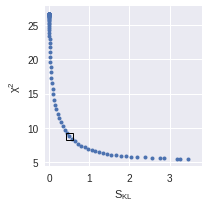

In [36]:
fig, ax = plt.subplots(figsize=(3,3))
sns.set_style('ticks')
ax.plot(opt_out[:,1], opt_out[:,2], "o", ms=4)
ax.plot(opt_out[:,1][th_all_index], opt_out[:,2][th_all_index], "s", mfc="None",
        mec="black", mew=1,label=r"$\mathregular{\theta}=$"+"{:.2f}".format(
th_all))
fig, ax = format_ala5_chi_s_plot(fig, ax, xlim=[-0.1,3.8])
fig.tight_layout()
! mkdir -p plots/opt_overview
fig.savefig("plots/opt_overview/ala5_L-curve_{}.pdf".format(para_set))

In [37]:
print opt_out[:,2][th_all_index], opt_out[:,2][th_all_index] / 28

8.80290191103 0.314389353965


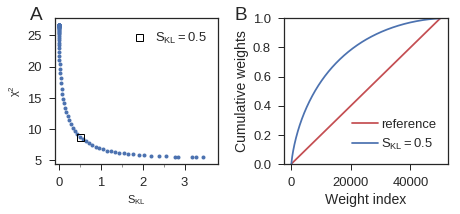

In [38]:
fig, ax = plt.subplots(1,2, figsize=(6.5,3))
sns.set_style('ticks')
ax[0].plot(opt_out[:,1], opt_out[:,2], "o", ms=4)
ax[0].plot(opt_out[:,1][th_all_index], opt_out[:,2][th_all_index], "s", mfc="None",
mec="black", mew=1,label=r"$\mathregular{S_{KL}=0.5}$")
fig, ax[0] = format_ala5_chi_s_plot(fig, ax[0], xlim=[-0.1,3.8])
ax[1].plot(np.cumsum(np.sort(w0)[::-1]), c=cl[2], label="reference")
ax[1].plot(np.cumsum(np.sort(w_s05)[::-1]), c=cl[0], label=r"$\mathregular{S_{KL}=0.5}$")
ax[1].set_ylim(0,1)
ax[1].set_xlabel("Weight index", fontsize=14)
ax[1].set_ylabel("Cumulative weights", fontsize=14)
ax[0].text(-0.15,0.99, "A", fontsize=19, transform=ax[0].transAxes)
ax[1].text(-0.3,0.99, "B", fontsize=19, transform=ax[1].transAxes)

for ai, a in enumerate(['A', 'B']):
    ax[ai].legend(fontsize=13, handletextpad=0.2)
    #ax[ai].text(-0.3,1.01, a , fontsize=18, transform=ax[ai].transAxes)
    ax[ai].tick_params(axis='both', which='major', labelsize=13)
    fig.tight_layout()

! mkdir -p plots/opt_overview
fig.savefig("plots/opt_overview/ala_chi2_S_{}.pdf".format(para_set))

In [39]:
# save for replotting L-curves
np.savetxt("plots/opt_overview/s_chi2_{:.2f}".format(th_all),
np.column_stack((opt_out[:,1], opt_out[:,2])))

In [40]:
opt_out[th_all_index]

array([  6.649436  ,   0.50066783,   8.80290191,  12.1320606 ])

In [41]:
print th_all

6.64943599667


#### Ramachandran plots

In [42]:
import matplotlib.colors as colors

def phi_psi_pmf(phi_psi, nbins=100, return_edges=False, weights=None, missing_counts_g=15):
    c, ex, ey = phi_psi_hist(phi_psi, nbins=nbins, weights=weights)
    lnp = ln_p_hist_counts(c, missing_counts_g=missing_counts_g)
    
    if return_edges:
       return lnp, ex, ey
    else:
         return lnp
        

def ln_p_hist_counts(c, missing_counts_g=15):
    ln_counts = -np.log(c / float(c.sum()))
    ln_counts[np.isinf(ln_counts)] = missing_counts_g
    return ln_counts

def phi_psi_hist(phi_psi, nbins=100, weights=None):
    c, xe, ye = np.histogram2d(phi_psi[:,0], phi_psi[:,1], bins=nbins,
                                range=[[-180,180],[-180,180]],
                                weights=weights)
    return c, xe, ye  


def plot_rama_delta_g(free_energy_2d, fig_ax=None, vmin=-3, vmax=3, label="MD-PDB", cmap='bwr'):
    
    if np.all(fig_ax) is None:
       fig, ax = plt.subplots(figsize=(4.5,4.5))
    else:
         fig, ax = fig_ax
    
    im = ax.imshow(free_energy_2d, origin="low",
                   extent=[-180,180, -180,180], label=label, cmap=cmap,  vmin=vmin, vmax=vmax)

    cb = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, norm=colors.Normalize(vmin=vmin, vmax=vmax))
    
    ax.set_xticks(np.arange(-180, 180+90, step=90));
    ax.set_yticks(np.arange(-180, 180+90, step=90));
    
    ax.set_xlabel("$\mathregular{\phi \; [^{\circ}]}$", fontsize=13)
    ax.set_ylabel("$\mathregular{\psi \; [^{\circ}]}$", fontsize=13)
    
    return fig, ax, cb



##### MD results

In [43]:
#p="/home/tb/lustelzl/DATA/Projects/BioEn/5ala/ala5_ph2_2/run_1us_2/jcoupling_sk10/"
# /home/tb/lustelzl/DATA/Projects/BioEn/5ala/ala5_ph2_2/run_1us_2/jcoupling_sk10/phi_psi_deg.tar.gz

In [44]:
! ls c_phi_psi*

c_phi_psi_deg_2  c_phi_psi_deg_4  c_phi_psi_deg_6
c_phi_psi_deg_3  c_phi_psi_deg_5


In [45]:
p="."
fn = p+"/c_phi_psi_deg_{}"
step = 2
res_phi_psi_ar_l = [np.genfromtxt(fn.format(i))[::step] for i in range(3,6)]

In [46]:
md_phi_psi = np.vstack(res_phi_psi_ar_l)

In [47]:
md_phi_psi.shape

(150003, 2)

##### Optimal BioEn ensemble 

In [48]:
md_w_all = np.hstack(([w_s05]*3))

In [49]:
nbins = 65
missing_pmf = 16

In [50]:
lnp_all = phi_psi_pmf(md_phi_psi, weights=md_w_all,
                      nbins=nbins, missing_counts_g=missing_pmf)


/home/tb/lustelzl/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


In [51]:
lnp_md = phi_psi_pmf(md_phi_psi, nbins=nbins, return_edges=False, missing_counts_g=missing_pmf)

/home/tb/lustelzl/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


#### PDB statistics

In [52]:
#! cp /home/tb/lustelzl/DATA/Projects/BioEn/5ala/coil-ala/ala_phi_psi.txt .

In [53]:
pdb_phi_psi = np.genfromtxt("ala_phi_psi.txt")

In [54]:
lnp_pdb = phi_psi_pmf(pdb_phi_psi, nbins=nbins, return_edges=False, missing_counts_g=missing_pmf)

/home/tb/lustelzl/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


#### Plot

/home/tb/lustelzl/DATA/Projects/BioEn/release-bioen/bioen-public/BioEn/examples/ala5_optimize


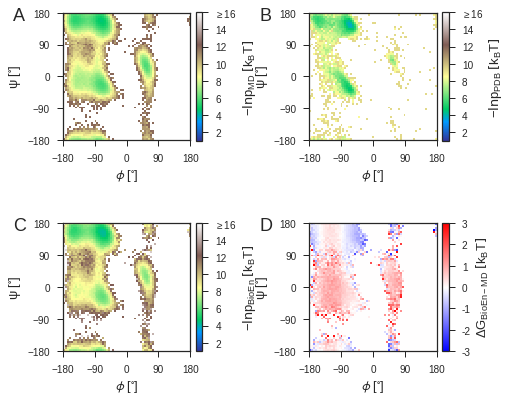

In [55]:
! pwd
! mkdir -p plots
! mkdir -p plots/phi_psi_lnp

fig, ax = plt.subplots(2,2, figsize=(7.,6))

fig, ax[0,0], cb0 = plot_rama_delta_g(lnp_md.T, vmin=1, vmax=16, fig_ax=[fig, ax[0,0]], cmap="terrain")
fig, ax[0,1], cb1 = plot_rama_delta_g(lnp_pdb.T, vmin=1, vmax=16, fig_ax=[fig, ax[0,1]], cmap="terrain")

fig, ax[1,0], cb2 = plot_rama_delta_g(lnp_all.T, vmin=1, vmax=16, fig_ax=[fig, ax[1,0]], cmap='terrain')
fig, ax[1,1], cb3 = plot_rama_delta_g(lnp_all.T - lnp_md.T, vmin=-3, vmax=3, fig_ax=[fig, ax[1,1]])

cb3.set_ticks([-3, -2, -1, 0, 1, 2, 3])
cb3.set_ticklabels(['-3', '-2', '-1', '0', '1', '2', '3'])

for cb in [cb0, cb1, cb2]:
    cb.set_ticks([2,4, 6,8,10,12,14, 16])
    cb.set_ticklabels(['2', '4', '6', '8', '10', '12', '14', '$\mathregular{\geq 16}$'])

cb0.set_label(r"$\mathregular{- \ln p_{MD}   \; \left[k_BT \right]}$",
            fontsize=13)
cb1.set_label(r"$\mathregular{- \ln p_{PDB}   \; \left[k_BT \right]}$",
            fontsize=13)

cb2.set_label(r"$\mathregular{- \ln p_{BioEn}   \; \left[k_BT \right]}$",
            fontsize=13)
cb3.set_label(r"$\mathregular{\Delta G_{BioEn-MD}   \; \left[k_BT \right]}$",
            fontsize=13)


for ai, a in enumerate(['A', 'B', 'C', 'D']):
    ax.flat[ai].text(-320, 160, a, fontsize=18)


fig.tight_layout()
fig.savefig("plots/phi_psi_lnp/{}_lnp_phi_psi_all.pdf".format(para_set))